# **Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automóvil**

**Universidad EAN**

**Machine Learning 1**

**Guía 2  Actividad 1**

Presentado por

**María Camila Tarazona Nieto**

**Leyla Rocío Becerra Barajas**

---
# **Librerías**
---
Instalación de paquetes, importar las librerías necesarias y cargar la base de datos

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

---
# **Versiones**
---
Este documento fue realizado con las siguientes versiones:

- Python 3.10.12
- NumPy 1.25.2
- Pandas 1.5.3
- Matplotlib 3.8

In [ ]:
#Versiones actuales
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)

Python 3.10.12
NumPy 1.25.2
Pandas 2.0.3


---
# **Instalaciones**
---
Se instala el paquete de [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), con el fin de tener acceso directo a la base de de datos "[Car evaluation](https://archive.ics.uci.edu/dataset/19/car+evaluation)", la cual forma parte del informe "[Knowledge acquisition and explanation for multi-attribute decision making](https://www.semanticscholar.org/paper/KNOWLEDGE-ACQUISITION-AND-EXPLANATION-FOR-DECISION-Bohanec-Rajkovi%C4%8D/8bab443ae322ff47c3e609272bd93fd4650555bc)"



In [ ]:
pip install ucimlrepo

---
# **Base de datos**
---
La base de datos está constituida por dos conjuntos de datos que relacionan las muestras de vino tinto y blanco de Vinho Verde en Portugal.  Es objetivo es modelar la calidad del vino basándose en pruebas fisicoquímicas.


### **Carga de Base de datos**

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [ ]:
# Selección de la base de datos y carga de sus datos en una variable
carevaluation = fetch_ucirepo(id=19)
carevaluation

{'data': {'ids': None,
  'features':      buying  maint  doors persons lug_boot safety
  0     vhigh  vhigh      2       2    small    low
  1     vhigh  vhigh      2       2    small    med
  2     vhigh  vhigh      2       2    small   high
  3     vhigh  vhigh      2       2      med    low
  4     vhigh  vhigh      2       2      med    med
  ...     ...    ...    ...     ...      ...    ...
  1723    low    low  5more    more      med    med
  1724    low    low  5more    more      med   high
  1725    low    low  5more    more      big    low
  1726    low    low  5more    more      big    med
  1727    low    low  5more    more      big   high
  
  [1728 rows x 6 columns],
  'targets':       class
  0     unacc
  1     unacc
  2     unacc
  3     unacc
  4     unacc
  ...     ...
  1723   good
  1724  vgood
  1725  unacc
  1726   good
  1727  vgood
  
  [1728 rows x 1 columns],
  'original':      buying  maint  doors persons lug_boot safety  class
  0     vhigh  vhigh      2    

In [ ]:
# Exploración inicial de los datos - metadatos de la información
carevaluation.metadata

{'uci_id': 19,
 'name': 'Car Evaluation',
 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation',
 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv',
 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.',
 'area': 'Other',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1728,
 'num_features': 6,
 'feature_types': ['Categorical'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1988,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5JP48',
 'creators': ['Marko Bohanec'],
 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making',
  'authors': 'M. Bohanec, V. Rajkovič',
  'published_in': '8th Intl Workshop on Expert Systems and their Applications

In [ ]:
carevaluation.data

{'ids': None,
 'features':      buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns],
 'targets':       class
 0     unacc
 1     unacc
 2     unacc
 3     unacc
 4     unacc
 ...     ...
 1723   good
 1724  vgood
 1725  unacc
 1726   good
 1727  vgood
 
 [1728 rows x 1 columns],
 'original':      buying  maint  doors persons lug_boot safety  class
 0     vhigh  vhigh      2       2    small    low  unacc
 1     vhig

## **Exploración de la Base de datos**

Se exploran los datos de la base de datos para familiarizarse con la información, tipos de datos y cantidad de registros

In [ ]:
# Exploración inicial de los datos - variables disponibles
carevaluation.variables

,name,role,type,demographic,description,units,missing_values
0,buying,Feature,Categorical,None,buying price,None,no
1,maint,Feature,Categorical,None,price of the maintenance,None,no
2,doors,Feature,Categorical,None,number of doors,None,no
3,persons,Feature,Categorical,None,capacity in terms of persons to carry,None,no
4,lug_boot,Feature,Categorical,None,the size of luggage boot,None,no
5,safety,Feature,Categorical,None,estimated safety of the car,None,no
6,class,Target,Categorical,None,"evaulation level (unacceptable, acceptable, go...",None,no


In [ ]:
# Exploración inicial de los datos - características
carevaluation.data.features

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [ ]:
carevaluation.data.targets

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


---
# **Análisis exploratorio de los datos**
---

## **Uso de un dataframe (pandas)**

Se crea una estructura de datos "dataframe" de la librería [pandas](https://https://pandas.pydata.org/) la cual facilita el análisis de los datos, puesto que  ya cuenta con funciones implementadas para ello.

In [ ]:
df=pd.DataFrame(carevaluation.data.features, columns=carevaluation.variables.name)

In [ ]:
df.loc[:,'class']=carevaluation.data.targets

In [ ]:
df

name,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


##**Identificación de variables**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

In [ ]:
# Exploración inicial del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### **buying**
Es una variable categorica que corresponde al precio de compra.

In [ ]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['buying'].value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

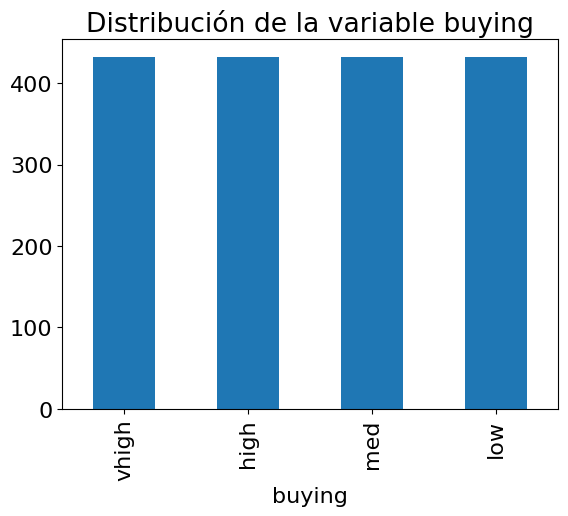

In [ ]:
df['buying'].value_counts(ascending=True).plot.bar()
plt.title('Distribución de la variable buying')
plt.show()

### **maint**
Es una variable categorica que corresponde al precio de mantenimiento.

In [ ]:
df['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['maint'].value_counts()

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

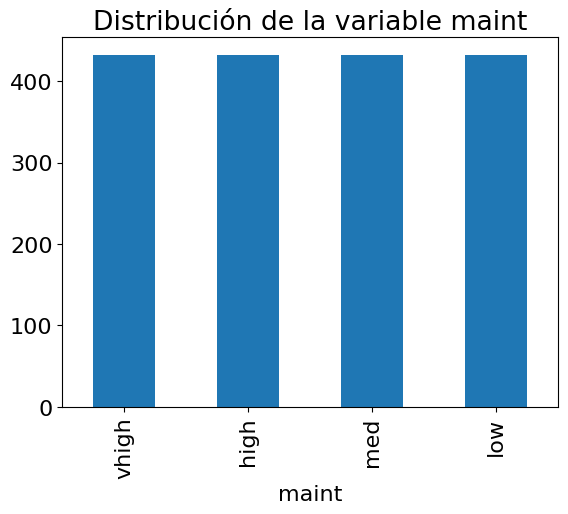

In [ ]:
df['maint'].value_counts(ascending=True).plot.bar()
plt.title('Distribución de la variable maint')
plt.show()

### **doors**
Es una variable categorica que describe el número de puertas

In [ ]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
df['doors'].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

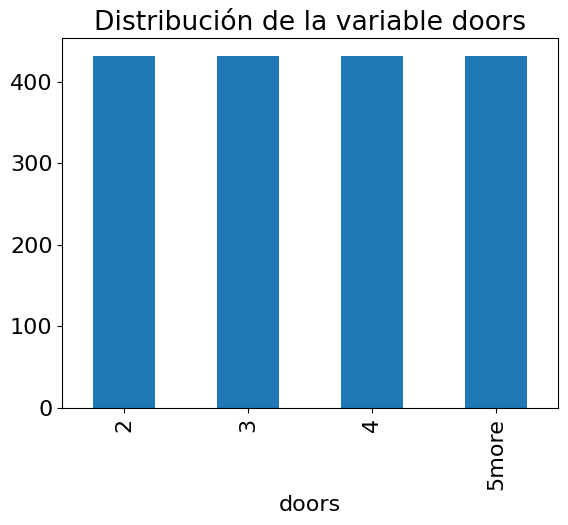

In [ ]:
df['doors'].value_counts(ascending=True).plot.bar()
plt.title('Distribución de la variable doors')
plt.show()

### **persons**
Es una variable categorica que describe el número de personas que puede transportar el vehículo

In [ ]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
df['persons'].value_counts()

persons
2       576
4       576
more    576
Name: count, dtype: int64

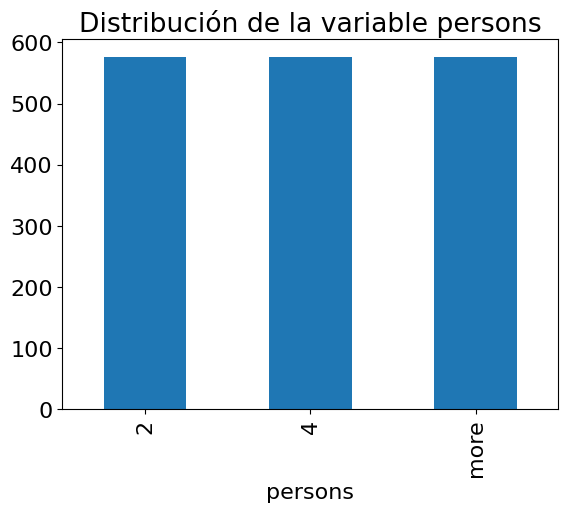

In [ ]:
df['persons'].value_counts(ascending=True).plot.bar()
plt.title('Distribución de la variable persons')
plt.show()

### **lug_boot**
Es una variable categorica que describe el tamaño del maletero

In [ ]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
df['lug_boot'].value_counts()

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

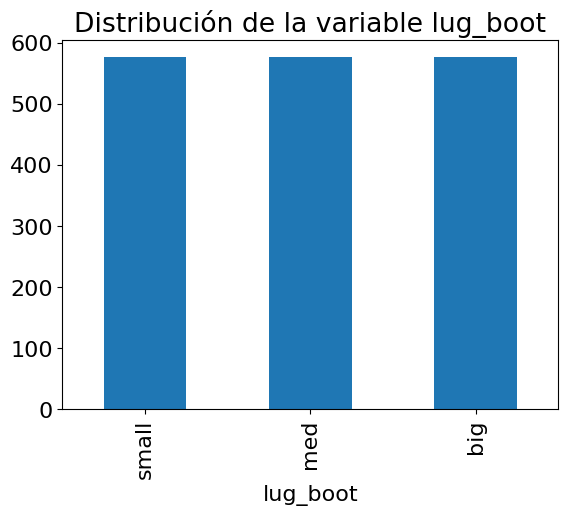

In [ ]:
df['lug_boot'].value_counts(ascending=True).plot.bar()
plt.title('Distribución de la variable lug_boot')
plt.show()

### **safety**
Es una variable categorica que describe la seguridad del carro

In [ ]:
df['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
df['safety'].value_counts()

safety
low     576
med     576
high    576
Name: count, dtype: int64

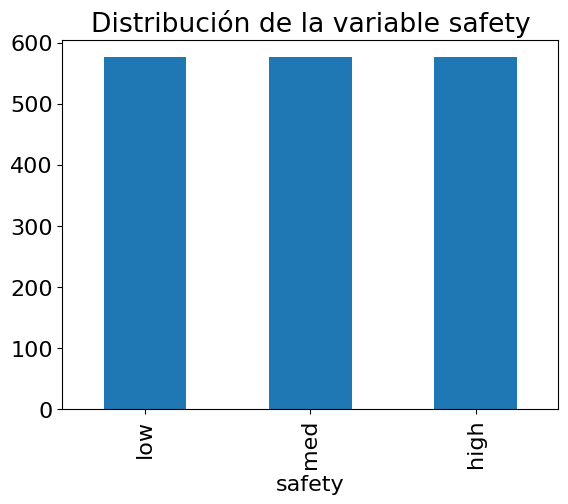

In [ ]:
df['safety'].value_counts(ascending=True).plot.bar()
plt.title('Distribución de la variable safety')
plt.show()

### **class**
Es una variable categorica que describe la evaluación del carro.

In [ ]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

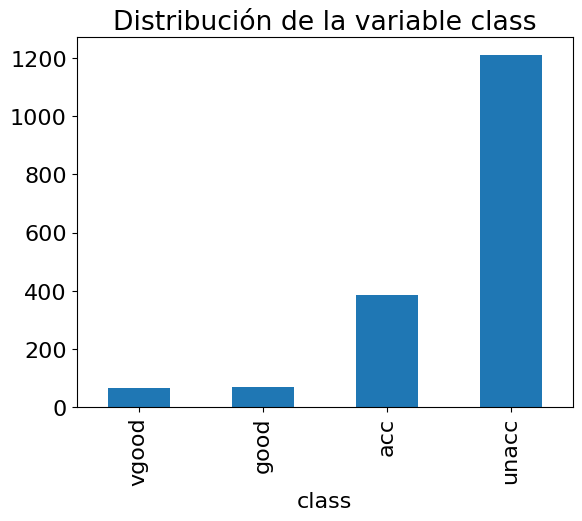

In [ ]:
df['class'].value_counts(ascending=True).plot.bar()
plt.title('Distribución de la variable class')
plt.show()

---
# **Preparación de los datos**
---

Se preparan los datos para ser usados en los modelos.  Las categorías de cada una de las variables se convierten en números que faciliten el procesamiento.

In [ ]:
df.buying.replace(('low','med','high','vhigh'),(1,2,3,4), inplace=True)
df.maint.replace(('low','med','high','vhigh'),(1,2,3,4), inplace=True)
df.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
df.persons.replace(('2','4','more'),(1,2,3), inplace=True)
df.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
df.safety.replace(('low','med','high'),(1,2,3), inplace=True)
df['class'].replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)
df

name,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,3
1724,1,1,4,3,2,3,4
1725,1,1,4,3,3,1,1
1726,1,1,4,3,3,2,3


In [ ]:
variables= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
variables

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = df[variables]
y = df['class']

In [ ]:
X

name,buying,maint,doors,persons,lug_boot,safety
0,4,4,1,1,1,1
1,4,4,1,1,1,2
2,4,4,1,1,1,3
3,4,4,1,1,2,1
4,4,4,1,1,2,2
...,...,...,...,...,...,...
1723,1,1,4,3,2,2
1724,1,1,4,3,2,3
1725,1,1,4,3,3,1
1726,1,1,4,3,3,2


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1723    3
1724    4
1725    1
1726    3
1727    4
Name: class, Length: 1728, dtype: int64

---
# **Partición de la base de datos**
---

Se distribuyen los datos de la base de datos entre datos de entrenamiento y datos de prueba, para ser usados posteriormente en los diferentes modelos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 70% para entrenamiento, 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(1209, 6)

In [ ]:
X_test.shape

(519, 6)

---
# **Modelo de Regresión Logística**
---

Se debe establecer y resolver el modelo de regresión logística que determine la ecuación representativa de la situación

In [ ]:
# Crear el modelo de regresión lineal
lr = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)
score_train=lr.score(X_train, y_train)
int_log=lr.intercept_[0]
coe_log=lr.coef_[0]
caracteristicas=lr.feature_names_in_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
## **Evaluación del modelo**
---

In [ ]:
# Realizar predicciones sobre los datos de prueba
y_pred = lr.predict(X_test)


In [ ]:
score_test=lr.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.8378825475599669
Score datos de prueba       : 0.815028901734104


El modelo de regresión logística posee un buen rendimiento. Un puntaje de entrenamiento de 0.837 y un puntaje de prueba de 0.815 son indicadores sólidos de que tu modelo está generalizando bien.

## __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [ ]:
lr_cm = confusion_matrix(y_test , y_pred)
print ("Confusion Matrix: \n", lr_cm)

Confusion Matrix: 
 [[339  21   1   2]
 [ 46  66   2   1]
 [  2  14   7   2]
 [  0   5   0  11]]


- La primera fila indica que de las observaciones de la clase 0 en los datos de prueba, 339 fueron clasificadas correctamente como clase 0, 21 fueron clasificadas erróneamente como clase 1, 1 como clase 2 y 2 como clase 3.
- La segunda fila indica que de las observaciones de la clase 1 en los datos de prueba, 46 fueron clasificadas erróneamente como clase 0, 66 como clase 1, 2 como clase 2 y 1 como clase 3.
- La tercera fila indica que de las observaciones de la clase 2 en los datos de prueba, 2 fueron clasificadas erróneamente como clase 0, 14 como clase 1, 7 como clase 2 y 2 como clase 3.
- La cuarta fila indica que de las observaciones de la clase 3 en los datos de prueba, 0 fueron clasificadas erróneamente como clase 0, 5 como clase 1, ninguna como clase 2 y 11 como clase 3.

Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

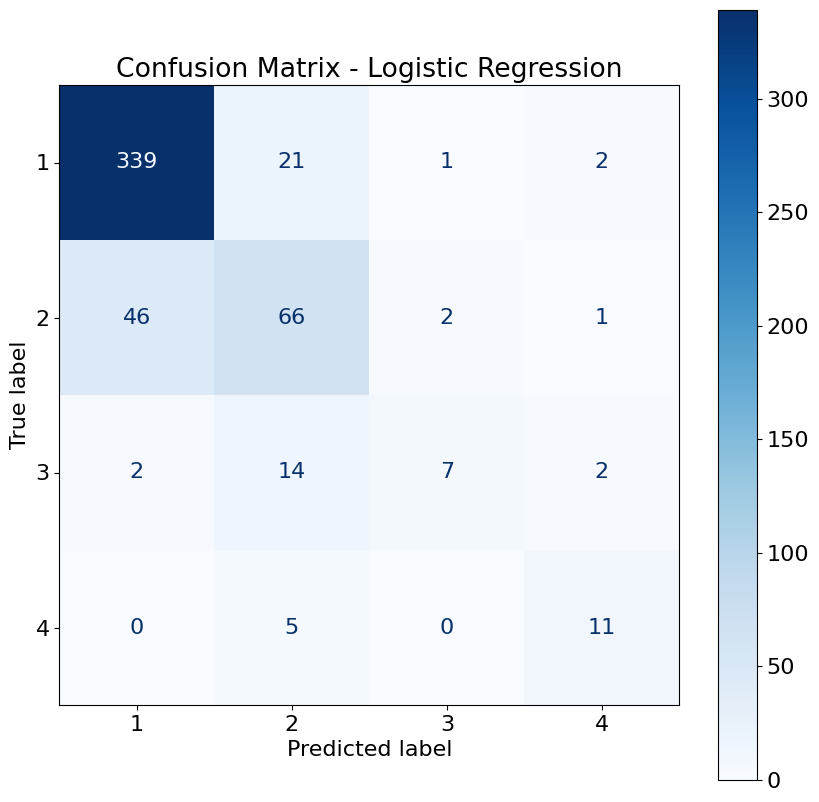

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(lr,
                                             X_test,
                                             y_test,
                                             display_labels=modeloLog.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression')

## __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [ ]:
target_names = ['unacc','acc','good','vgood']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       unacc       0.88      0.93      0.90       363
         acc       0.62      0.57      0.60       115
        good       0.70      0.28      0.40        25
       vgood       0.69      0.69      0.69        16

    accuracy                           0.82       519
   macro avg       0.72      0.62      0.65       519
weighted avg       0.81      0.82      0.81       519



In [ ]:
rlp, rlr, rls, rlu =precision_recall_fscore_support(y_test, y_pred, average= 'macro')
rl_metricas=['Regresión Logística', rlp, rlr, rls]
rl_metricas

['Regresión Logística',
 0.7215276254205061,
 0.6188243352497305,
 0.6471962669683258]

Estos valores indican el rendimiento general del modelo en la clasificación de todas las clases, proporcionando una visión del equilibrio entre precisión y recall. En general, un modelo con valores más altos en estas métricas se considera mejor en términos de su capacidad para clasificar correctamente las muestras.

---
# **Árbol de decisión**
---


In [ ]:
# Crear el modelo de regresión lineal
dt = DecisionTreeClassifier(max_depth = 7,random_state = 48)

# Entrenar el modelo con los datos de entrenamiento
dt.fit(X_train, y_train)
score_train=dt.score(X_train, y_train)
score_train

0.9470636889991728

Esto indica que el modelo está haciendo predicciones con una alta precisión. Es importante recordar que un puntaje de 1.0 sería la precisión perfecta, por lo que estar tan cerca de 1.0 sugiere que el modelo está capturando efectivamente los patrones en los datos y haciendo predicciones muy precisas.

---
## **Evaluación del modelo**
---

In [ ]:
# Realizar predicciones sobre los datos de prueba
y_pred = dt.predict(X_test)

In [ ]:
score_test=dt.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.9470636889991728
Score datos de prueba       : 0.9229287090558767


- Score datos de entrenamiento (0.947): Indica que el modelo está prediciendo correctamente alrededor del 94.7% de las muestras en el conjunto de datos de entrenamiento. Esto significa que el modelo se ajusta bien a los datos de entrenamiento.
- Score datos de prueba (0.923): Indica que el modelo está prediciendo correctamente alrededor del 92.3% de las muestras en el conjunto de datos de prueba. Esto sugiere que el modelo generaliza bien a datos no vistos, lo cual es crucial para la efectividad del modelo en situaciones del mundo real.


## __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [ ]:
conf_matrix = confusion_matrix(y_test , y_pred)
print ("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[352  11   0   0]
 [  5 102   7   1]
 [  2   5  14   4]
 [  0   5   0  11]]


- La primera fila indica que de las observaciones de la clase 0 en los datos de prueba, 352 fueron clasificadas correctamente como clase 0, 11 fueron clasificadas erróneamente como clase 1, y ninguna como las clases 2 o 3.
- La segunda fila indica que de las observaciones de la clase 1 en los datos de prueba, 5 fueron clasificadas erróneamente como clase 0, 102 como clase 1, 7 como clase 2 y 1 como clase 3.
- La tercera fila indica que de las observaciones de la clase 2 en los datos de prueba, 2 fueron clasificadas erróneamente como clase 0, 5 como clase 1, 14 como clase 2 y 4 como clase 3.
- La cuarta fila indica que de las observaciones de la clase 3 en los datos de prueba, 0 fueron clasificadas erróneamente como clase 0, 5 como clase 1, ninguna como clase 2 y 11 como clase 3.

Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

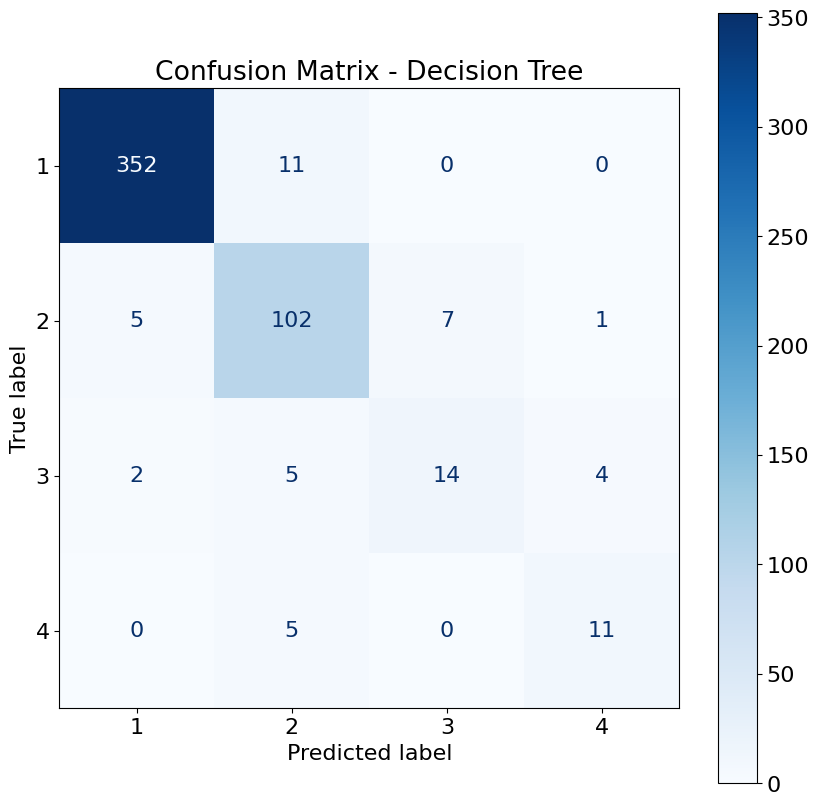

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(dt,
                                             X_test,
                                             y_test,
                                             display_labels=modeloLog.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Decision Tree')

## __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [ ]:
target_names = ['unacc','acc','good','vgood']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       unacc       0.98      0.97      0.98       363
         acc       0.83      0.89      0.86       115
        good       0.67      0.56      0.61        25
       vgood       0.69      0.69      0.69        16

    accuracy                           0.92       519
   macro avg       0.79      0.78      0.78       519
weighted avg       0.92      0.92      0.92       519



In [ ]:
dtp, dtr, dts, dtu =precision_recall_fscore_support(y_test, y_pred, average= 'macro')
dt_metricas=['Árbol de decisión', dtp, dtr, dts]
dt_metricas

['Árbol de decisión',
 0.7909840880268134,
 0.776038372859025,
 0.7821019403485832]

Estos valores indican el rendimiento general del modelo en la clasificación de todas las clases, proporcionando una visión del equilibrio entre precisión y recall. En general, un modelo con valores más altos en estas métricas se considera mejor en términos de su capacidad para clasificar correctamente las muestras.

---
# **Random Forest**
---


In [ ]:
# Crear el modelo de regresión lineal
rf = RandomForestClassifier(max_depth = 7,random_state = 48)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)
score_train=rf.score(X_train, y_train)
score_train

0.978494623655914

 Un puntaje de 0.978 en un modelo Random Forest indica un rendimiento muy alto y una capacidad sobresaliente para realizar predicciones precisas en la tarea para la que se ha entrenado el modelo. Esto sugiere que el modelo es altamente confiable y efectivo en la clasificación o predicción de datos nuevos.

---
## **Evaluación del modelo**
---

In [ ]:
# Realizar predicciones sobre los datos de prueba
y_pred = rf.predict(X_test)

In [ ]:
score_test=rf.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.978494623655914
Score datos de prueba       : 0.9499036608863198


- Score datos de entrenamiento (0.978): Esto indica que el modelo está prediciendo correctamente aproximadamente el 97.8% de las muestras en el conjunto de datos de entrenamiento. Esto sugiere un ajuste muy bueno del modelo a los datos de entrenamiento.
- Score datos de prueba (0.950): Este puntaje indica que el modelo está prediciendo correctamente alrededor del 95.0% de las muestras en el conjunto de datos de prueba. Esto sugiere que el modelo generaliza bien a datos nuevos, no vistos durante el entrenamiento.

## __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [ ]:
conf_matrix = confusion_matrix(y_test , y_pred)
print ("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[355   8   0   0]
 [  0 111   3   1]
 [  0   5  16   4]
 [  0   5   0  11]]


Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

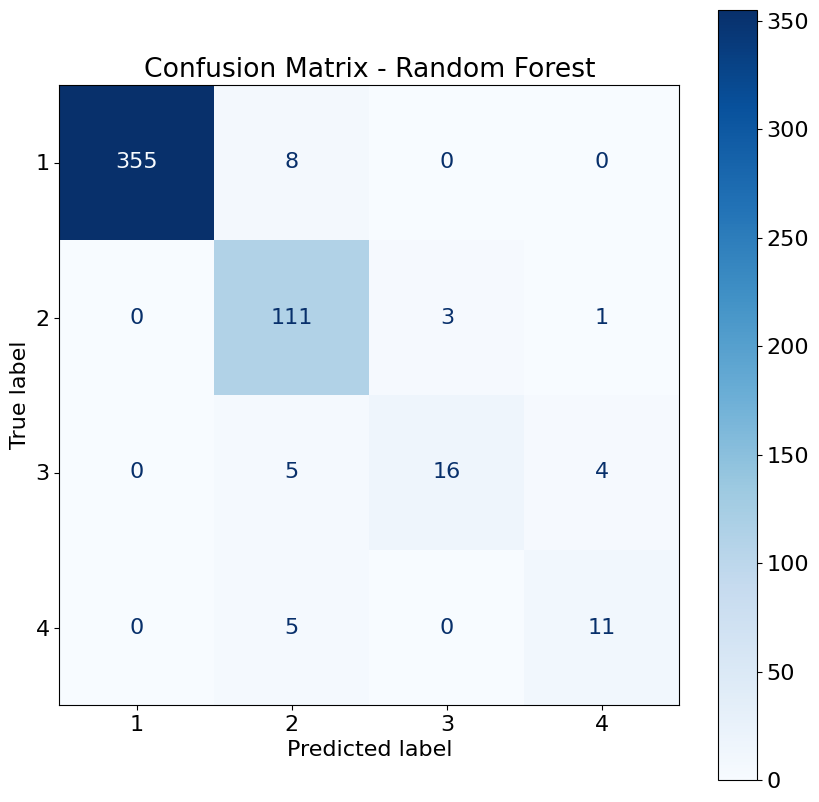

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(rf,
                                             X_test,
                                             y_test,
                                             display_labels=modeloLog.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Random Forest')

## __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [ ]:
target_names = ['unacc','acc','good','vgood']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       unacc       1.00      0.98      0.99       363
         acc       0.86      0.97      0.91       115
        good       0.84      0.64      0.73        25
       vgood       0.69      0.69      0.69        16

    accuracy                           0.95       519
   macro avg       0.85      0.82      0.83       519
weighted avg       0.95      0.95      0.95       519



In [ ]:
rfp, rfr, rfs, rfu =precision_recall_fscore_support(y_test, y_pred, average= 'macro')
rf_metricas=['Random forest', rfp, rfr, rfs]
rf_metricas

['Random forest', 0.847517594859241, 0.8176697059528087, 0.8283666828912901]

---
# **Comparación entre modelos**
---

In [ ]:
metricas=[rl_metricas, dt_metricas,rf_metricas]
df_metricas=pd.DataFrame(metricas, columns=['Classifier','Precission','Recall', 'F1 Score'])
df_metricas.style.background_gradient()

,Classifier,Precission,Recall,F1 Score
0,Regresión Logística,0.721528,0.618824,0.647196
1,Árbol de decisión,0.790984,0.776038,0.782102
2,Random forest,0.847518,0.817670,0.828367


---
# **Informe general de los resultados**
---

A través de este estudio se realizaron algunos análisis que permitieron identificar:



Basándonos en las métricas de precisión, recall y puntuación F1 proporcionadas para los tres modelos:

- **Regresión Logística**:
  - Aunque la regresión logística tiene un rendimiento decente, con una precisión de aproximadamente 0.722 y un recall de 0.619, su puntuación F1 es relativamente baja en comparación con los otros modelos.

- **Árbol de decisión**:
  - El árbol de decisión muestra un rendimiento sólido con una precisión de aproximadamente 0.791, un recall de 0.776 y una puntuación F1 de 0.782. Sin embargo, su rendimiento está ligeramente por debajo del Random Forest.

- **Random Forest**:
  - Random Forest supera a los otros modelos con una precisión de aproximadamente 0.848, un recall de 0.818 y una puntuación F1 de 0.828. Estas métricas más altas sugieren que Random Forest es el modelo más efectivo para predecir la calidad de los automóviles en este conjunto de datos.

En conclusión, el modelo Random Forest es el más adecuado para este problema de evaluación de calidad de automóviles, ya que proporciona la mejor combinación de precisión, recall y puntuación F1. Su capacidad para manejar conjuntos de datos complejos y capturar relaciones no lineales lo hace ideal para este tipo de problemas de clasificación.

# **Referencias**


[1] https://archive.ics.uci.edu/dataset/19/car+evaluation

[2] https://www.kaggle.com/code/elikplim/knn-and-ann-mlp-for-car-evaluation

[3] https://www.kaggle.com/code/mykeysid10/car-evaluation

